## 範例重點
### 學習在模型開始前檢查各個環節
1. 是否有 GPU 資源
2. 將前處理轉為函式，統一處理訓練、驗證與測試集
3. 將超參數變數化，易於重複使用函式、模型等

In [2]:
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [3]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [4]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0801 23:49:37.375991  3452 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0801 23:49:40.332083  3452 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0801 23:49:40.405884  3452 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0801 23:49:40.946438  3452 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0801 23:49:40.966386  3452 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0801 23:49:41.188507  3452 deprecation.py:323] From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0801 23:49:41.273012  3452 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 12s 245us/step - loss: 1.9421 - acc: 0.3019 - val_loss: 1.7683 - val_acc: 0.3642
Epoch 2/100
50000/50000 [==============================] - 11s 219us/step - loss: 1.7181 - acc: 0.3857 - val_loss: 1.7411 - val_acc: 0.37781
Epoch 3/100
50000/50000 [==============================] - 11s 229us/step - loss: 1.6245 - acc: 0.4220 - val_loss: 1.6016 - val_acc: 0.4272
Epoch 4/100
50000/50000 [==============================] - 11s 228us/step - loss: 1.5503 - acc: 0.4485 - val_loss: 1.5678 - val_acc: 0.4438
Epoch 5/100
50000/50000 [==============================] - 12s 237us/step - loss: 1.5087 - acc: 0.4618 - val_loss: 1.5443 - val_acc: 0.4407
Epoch 6/100
50000/50000 [==============================] - 14s 285us/step - loss: 1.4762 - acc: 0.4746 - val_loss: 1.5059 - val_acc: 0.4574
Epoch 7/100
50000/50000 [==============================] - 13s 258us/step - loss: 1.4373 - acc: 0.4875 - val_

Epoch 59/100
50000/50000 [==============================] - 15s 307us/step - loss: 0.5445 - acc: 0.8066 - val_loss: 1.9684 - val_acc: 0.5221
Epoch 60/100
50000/50000 [==============================] - 16s 321us/step - loss: 0.5388 - acc: 0.8073 - val_loss: 2.0035 - val_acc: 0.5194
Epoch 61/100
50000/50000 [==============================] - 17s 331us/step - loss: 0.5088 - acc: 0.8202 - val_loss: 2.0138 - val_acc: 0.5199
Epoch 62/100
50000/50000 [==============================] - 17s 340us/step - loss: 0.5053 - acc: 0.8206 - val_loss: 2.0415 - val_acc: 0.5178
Epoch 63/100
50000/50000 [==============================] - 16s 325us/step - loss: 0.5103 - acc: 0.8170 - val_loss: 2.1601 - val_acc: 0.5172
Epoch 64/100
50000/50000 [==============================] - 17s 333us/step - loss: 0.4982 - acc: 0.8216 - val_loss: 2.0660 - val_acc: 0.5162
Epoch 65/100
50000/50000 [==============================] - 16s 312us/step - loss: 0.4854 - acc: 0.8268 - val_loss: 2.1006 - val_acc: 0.5146
Epoch 66/100


In [12]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
import os
import keras

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
train, test = keras.datasets.cifar10.load_data()

In [14]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [15]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [16]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units = 10, num_neurons=[512, 256, 128]):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [17]:
model = build_mlp(input_shape = x_train.shape[1:], num_neurons=[512, 256, 128, 128, 128, 256, 256, 128, 512])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 256)               33024     
__________

In [18]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [19]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [20]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 21s 428us/step - loss: 1.9615 - acc: 0.2680 - val_loss: 1.8417 - val_acc: 0.3274
Epoch 2/100
50000/50000 [==============================] - 21s 428us/step - loss: 1.7755 - acc: 0.3532 - val_loss: 1.7028 - val_acc: 0.3823
Epoch 3/100
50000/50000 [==============================] - 21s 426us/step - loss: 1.7018 - acc: 0.3845 - val_loss: 1.6976 - val_acc: 0.3841
Epoch 4/100
50000/50000 [==============================] - 24s 488us/step - loss: 1.6351 - acc: 0.4126 - val_loss: 1.6167 - val_acc: 0.4219
Epoch 5/100
50000/50000 [==============================] - 22s 435us/step - loss: 1.5759 - acc: 0.4357 - val_loss: 1.5814 - val_acc: 0.4309
Epoch 6/100
50000/50000 [==============================] - 20s 394us/step - loss: 1.5361 - acc: 0.4470 - val_loss: 1.5634 - val_acc: 0.4452
Epoch 7/100
50000/50000 [==============================] - 21s 429us/step - loss: 1.4980 - acc: 0.4628 - val_l

50000/50000 [==============================] - 16s 324us/step - loss: 0.6066 - acc: 0.7798 - val_loss: 2.1195 - val_acc: 0.4922
Epoch 59/100
50000/50000 [==============================] - 16s 325us/step - loss: 0.5955 - acc: 0.7849 - val_loss: 2.0700 - val_acc: 0.4997
Epoch 60/100
50000/50000 [==============================] - 16s 312us/step - loss: 0.5860 - acc: 0.7856 - val_loss: 2.0214 - val_acc: 0.4971
Epoch 61/100
50000/50000 [==============================] - 17s 331us/step - loss: 0.5673 - acc: 0.7922 - val_loss: 2.0902 - val_acc: 0.4930
Epoch 62/100
50000/50000 [==============================] - 16s 318us/step - loss: 0.5863 - acc: 0.7859 - val_loss: 2.0888 - val_acc: 0.4930
Epoch 63/100
50000/50000 [==============================] - 16s 320us/step - loss: 0.5427 - acc: 0.7993 - val_loss: 2.1853 - val_acc: 0.5045
Epoch 64/100
50000/50000 [==============================] - 16s 322us/step - loss: 0.5573 - acc: 0.7970 - val_loss: 2.1374 - val_acc: 0.4994
Epoch 65/100
50000/50000 [

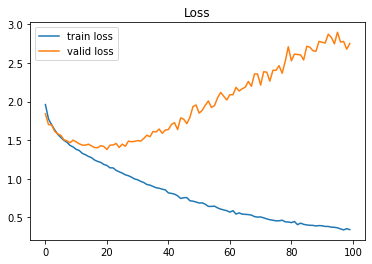

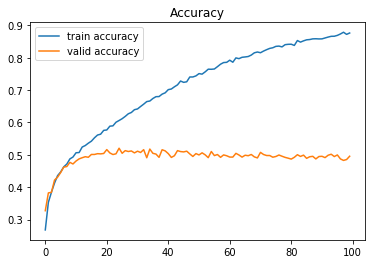

In [21]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()